In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score


In [2]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()

In [3]:
df = pd.DataFrame(housing_data.data)
df.columns = housing_data.feature_names
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
df['MedHouseVal'] = housing_data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


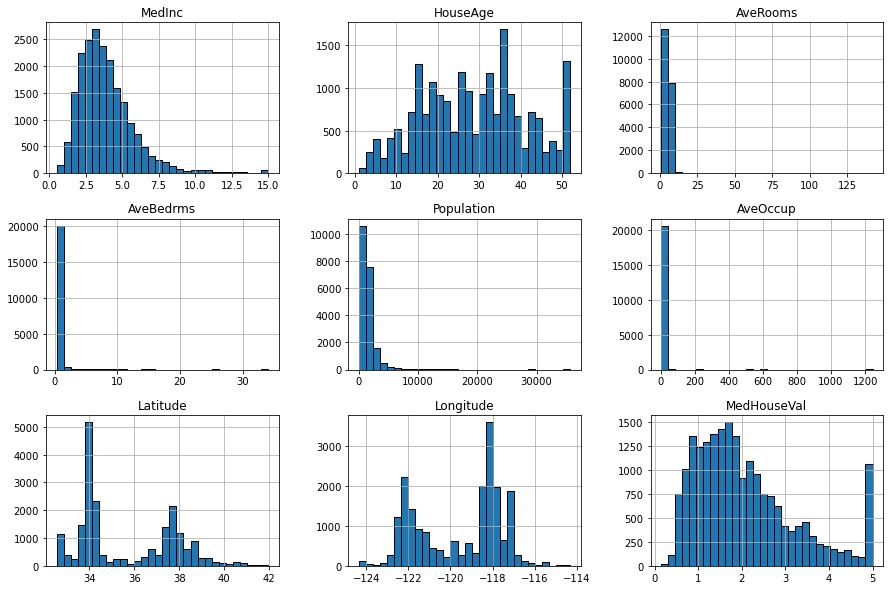

In [5]:
df.hist(figsize=(15,10),bins=30,edgecolor='black')
plt.show()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

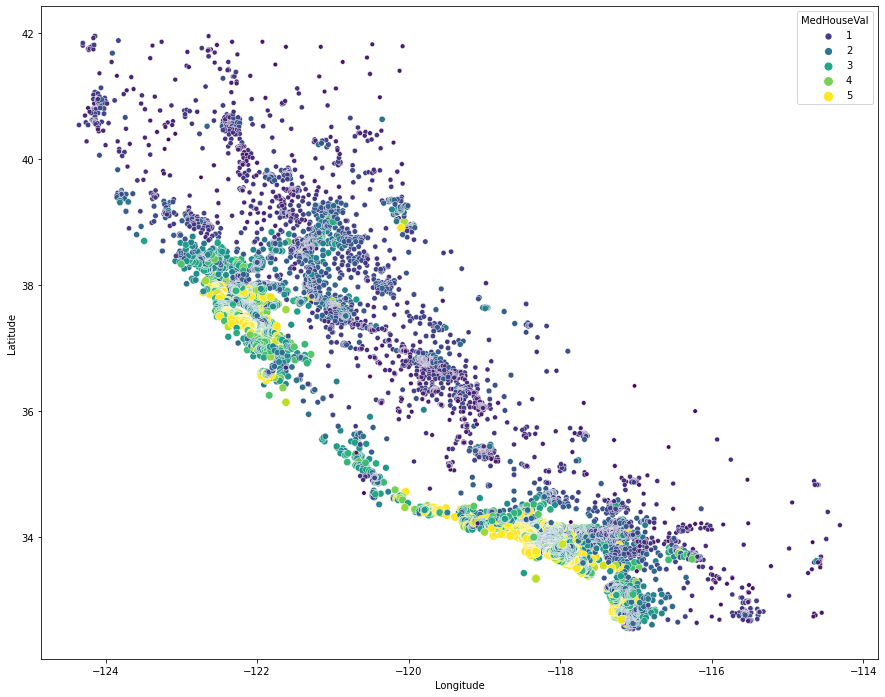

In [6]:
plt.figure(figsize=(15,12))
sns.scatterplot(data=df,x='Longitude',y='Latitude',hue='MedHouseVal',size='MedHouseVal',
               palette='viridis')

In [7]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

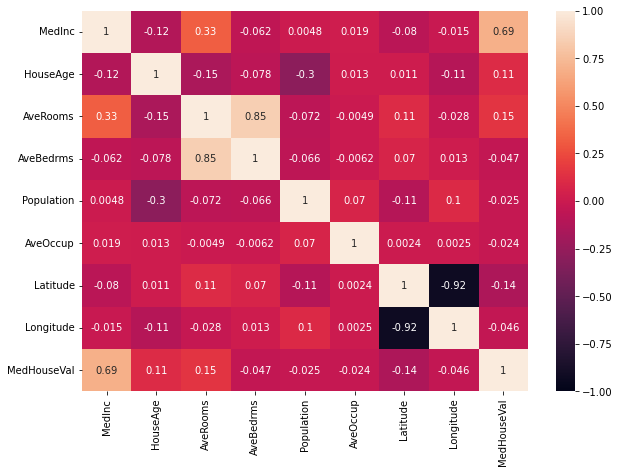

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)

In [9]:
df.corr()['MedHouseVal'].sort_values()

Latitude      -0.144160
AveBedrms     -0.046701
Longitude     -0.045967
Population    -0.024650
AveOccup      -0.023737
HouseAge       0.105623
AveRooms       0.151948
MedInc         0.688075
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

<AxesSubplot:xlabel='MedInc', ylabel='MedHouseVal'>

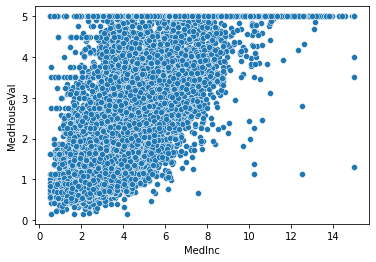

In [10]:
sns.scatterplot(x=df['MedInc'],y=df['MedHouseVal'])

<AxesSubplot:xlabel='AveRooms', ylabel='MedHouseVal'>

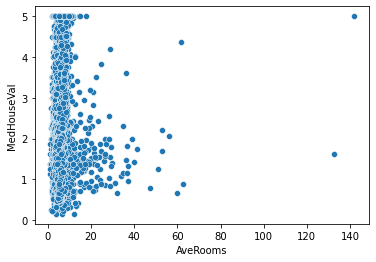

In [11]:
sns.scatterplot(x=df['AveRooms'],y=df['MedHouseVal'])

In [12]:
X = df.drop('MedHouseVal',axis=1)
y = df['MedHouseVal']

In [13]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [14]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_train:',y_test.shape)

X_train: (14448, 8)
X_test: (6192, 8)
y_train: (14448,)
y_train: (6192,)


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [17]:
lr_mae = mean_absolute_error(y_test,lr_pred)
lr_mse = mean_squared_error(y_test,lr_pred)
lr_r2 = r2_score(y_test,lr_pred)
print('MAE',lr_mae)
print('MSE',lr_mse)
print('R2',lr_r2)



MAE 0.5352476763196591
MSE 0.5296293151408235
R2 0.5971429737359628


In [18]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)


In [19]:
dt_mae = mean_absolute_error(y_test,dt_pred)
dt_mse = mean_squared_error(y_test,dt_pred)
dt_r2 = r2_score(y_test,dt_pred)
print('MAE',dt_mae)
print('MSE',dt_mse)
print('R2',dt_r2)

MAE 0.4521213888888889
MSE 0.5073227700171834
R2 0.6141102151212793


In [20]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [21]:
rf_mae = mean_absolute_error(y_test,rf_pred)
rf_mse = mean_squared_error(y_test,rf_pred)
rf_r2 = r2_score(y_test,rf_pred)
print('MAE',rf_mae)
print('MSE',rf_mse)
print('R2',rf_r2)

MAE 0.3312305305878555
MSE 0.25713652068251186
R2 0.8044117817789327


In [22]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [23]:
data = {'MedInc':7.325, 'HouseAge':30.0, 'AveRooms':5.9, 'AveBedrms':1.02, 'Population':200, 
        'AveOccup':2.20, 'Latitude':37.88, 'Longitude':37.88, }
index =[0]

new_df = pd.DataFrame(data,index)
new_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,7.325,30.0,5.9,1.02,200,2.2,37.88,37.88


In [24]:
value_pred = rf.predict(new_df)
print('The median housing value for the new data is:',value_pred[0])

The median housing value for the new data is: 3.272911899999999


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [25]:
rf.predict([[7,30,5.9,1.02,200,2.2,37,37]])

array([3.2729119])